<a href="https://colab.research.google.com/github/Sudeepkumar0/lab/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data=pd.read_csv("/content/give_me_credit.csv")
data=data.dropna()

x=data.drop("SeriousDlqin2yrs",axis=1)
y=data["SeriousDlqin2yrs"]
print(data.head())

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=52)
print("splited")

from sklearn.svm import SVC
model1 = SVC(kernel='rbf',C=1.0)
model1.fit(x_train,y_train)

y_pred=model1.predict(x_test)

from sklearn.metrics import classification_report,accuracy_score
print("ACCURACY ",accuracy_score(y_test,y_pred))
print("Classification report ", classification_report(y_test, y_pred))

correct = x_test[y_test == y_pred]
wrong = x_test[y_test != y_pred]

print("top 5 correct prediction",correct.head())
print("top 5 wrong prediction",wrong.head())


   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0               1.0                              0.766127  45.0   
1               0.0                              0.957151  40.0   
2               0.0                              0.658180  38.0   
3               0.0                              0.233810  30.0   
4               0.0                              0.907239  49.0   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                   2.0   0.802982         9120.0   
1                                   0.0   0.121876         2600.0   
2                                   1.0   0.085113         3042.0   
3                                   0.0   0.036050         3300.0   
4                                   1.0   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                             13.0                      0.0   
1                              4.0                      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data   # features
y = iris.target # labels

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model with RBF kernel (you can also try 'linear', 'poly')
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score:
1.0


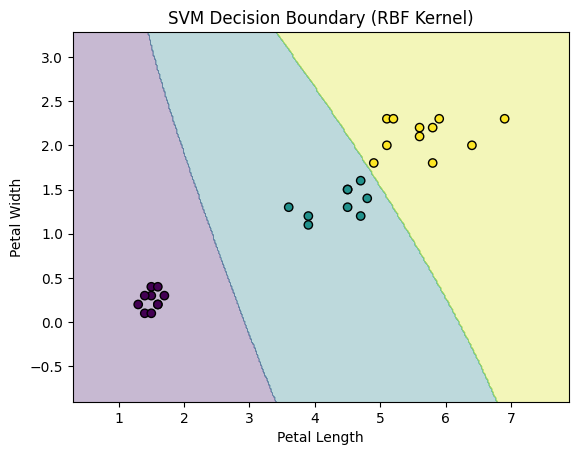

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select only 2 features for visualization (e.g., petal length & petal width)
X_vis = X[:, [2, 3]]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train again with 2 features
model_vis = SVC(kernel='rbf', C=1.0, gamma='scale')
model_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundaries
def plot_svm_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title('SVM Decision Boundary (RBF Kernel)')
    plt.show()

plot_svm_decision_boundary(X_test_vis, y_test_vis, model_vis)


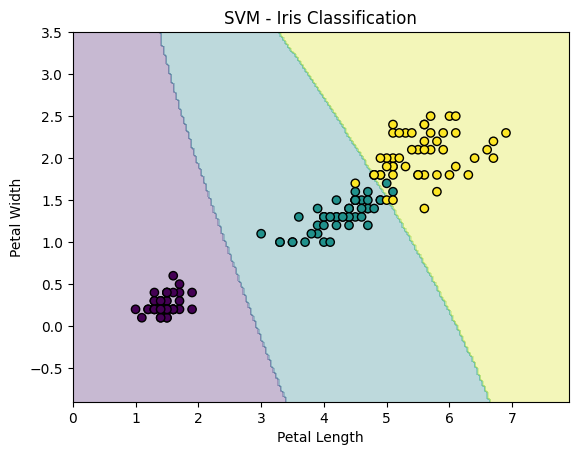

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load dataset and select two features
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train SVM
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Plotting
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM - Iris Classification')
plt.show()


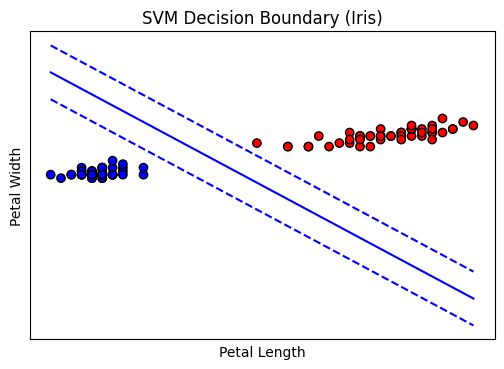

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load data and filter only 2 classes (Setosa and Versicolor)
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]   # Petal length & width
y = iris.target
X = X[y != 2]
y = y[y != 2]

# Train linear SVM
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Get weights and bias
w = clf.coef_[0]
b = clf.intercept_[0]

# Plot decision boundary and margins
x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = -(w[0]/w[1]) * x - b/w[1]
margin = 1 / np.linalg.norm(w)
y_margin_up = y_boundary + margin
y_margin_down = y_boundary - margin

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, y_boundary, 'b-')       # Decision boundary
plt.plot(x, y_margin_up, 'b--')     # Upper margin
plt.plot(x, y_margin_down, 'b--')   # Lower margin
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Style
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (Iris)')
plt.xticks([])
plt.yticks([])
plt.show()


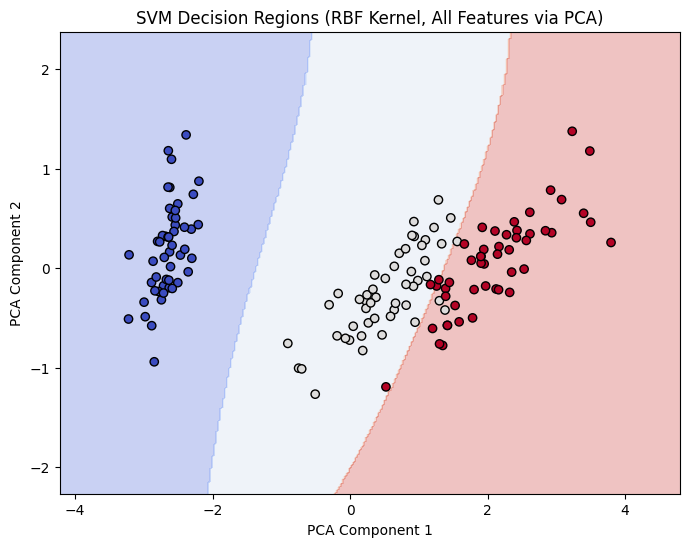

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data              # All 4 features
y = iris.target            # 3 classes

# Train SVM with RBF kernel
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X, y)

# Reduce features to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit another SVM on PCA-transformed data for boundary plotting
clf_pca = SVC(kernel='rbf', gamma='scale')
clf_pca.fit(X_pca, y)

# Create meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the mesh
Z = clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Regions (RBF Kernel, All Features via PCA)')
plt.show()
